참고자료
- https://github.com/opencv/opencv/tree/4.x/data/haarcascades
- https://seokii.tistory.com/112

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
from glob import glob
import zipfile

In [ ]:
os.makedirs('image/origin_image')
os.makedirs('image/cutting_image')

In [ ]:
!unzip -qq '/content/drive/MyDrive/LFW-FER/image.zip' -d /content/image/origin_image

In [ ]:
file_path = list(glob('/content/image/origin_image/*.jpg'))

file_path[0]

'/content/image/origin_image/Paul_Martin_0003.jpg'

In [ ]:
path_dir = '/content/image/origin_image'
file_list = os.listdir(path_dir)

file_list[1]

'Bob_Ferguson_0001.jpg'

In [ ]:
len(file_list)

9330

In [ ]:
file_name_list = []
for i in range(len(file_list)):
  file_name_list.append(file_list[i].replace('.jpg',""))

file_name_list[0]

'Paul_Martin_0003'

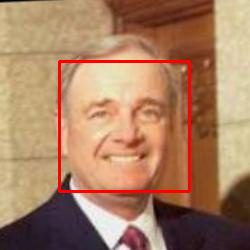

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread(file_path[0])
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/LFW-FER/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x, y, w, h), (0,0,255), 2)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

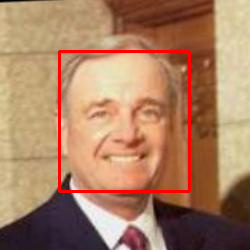

In [ ]:
image = cv2.imread(file_path[0])
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/LFW-FER/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x, y-10, w, h+10), (0,0,255), 2)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

[[ 59  61 131 131]]


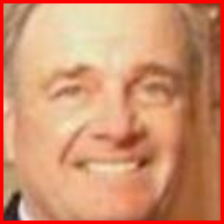

In [ ]:
image = cv2.imread(file_path[0])
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/LFW-FER/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x, y, w, h), (0,0,255), 2)
  cropped = image[y: y+h, x: x+w]
  resize_image = cv2.resize(cropped, (224,224))
  cv2_imshow(resize_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
def Cutting_face_save(image, name):
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/LFW-FER/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cropped = image[y: y+h, x: x+w]
        resize_image = cv2.resize(cropped, (224,224))
        cv2.imwrite(f"/content/image/cutting_image/{name}.jpg", resize_image)

# Cutting_face_save(file_path[0], file_name_list[0])

In [ ]:
for name in file_name_list:
    img = cv2.imread("/content/image/origin_image/"+name+".jpg")
    Cutting_face_save(img, name)